In [1]:
import time
import random
import json

import requests

from pandas import DataFrame
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

In [ ]:
# 解决画图无法正常使用的问题
# 查询当前matplotlib的配置配置目录,将下载下来的ttf文件放到mpl-data/fonts中
matplotlib.matplotlib_fname()

In [2]:
#指定默认字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei'] 
matplotlib.rcParams['font.family']='sans-serif'
#解决负号'-'显示为方块的问题
matplotlib.rcParams['axes.unicode_minus'] = False 

plt.rcParams['axes.labelsize'] = 8.
plt.rcParams['xtick.labelsize'] = 12. 
plt.rcParams['ytick.labelsize'] = 12.
plt.rcParams['legend.fontsize'] =10.
plt.rcParams['figure.figsize'] = [8.,8.]

In [ ]:
headers = {
    'Accept': 'application/json, text/javascript, */*; q=0.01',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'en-GB,en;q=0.5',
    'Cache-Control': 'max-age=0',
    'Connection': 'keep-alive',
    'Content-Length': '25',
    'Content-Type':	'application/x-www-form-urlencoded; charset=UTF-8',
    'Host':	'www.lagou.com',
    'Referer': 'https://www.lagou.com/jobs/list_python?px=default&city=%E4%B8%8A%E6%B5%B7',
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:61.0) Gecko/20100101 Firefox/61.0',
    'X-Anit-Forge-Code': '0',
    'X-Anit-Forge-Token': None,
    'X-Requested-With': 'XMLHttpRequest',
}

columns=['companyId', 'positionName', 'workYear', 'education', 'jobNature', 
         'companyLogo', 'industryField', 'financeStage', 'companySize',
         'city', 'salary', 'positionId', 'positionAdvantage', 'companyShortName',
         'createTime', 'district', 'score', 'approve', 'positionLables', 
         'industryLables', 'publisherId', 'companyLabelList', 'businessZones', 
         'longitude', 'latitude', 'formatCreateTime', 'companyFullName', 
         'adWord', 'hitags', 'resumeProcessRate', 'resumeProcessDay', 
         'imState', 'lastLogin', 'explain', 'plus', 'pcShow', 'appShow', 
         'deliver', 'gradeDescription', 'promotionScoreExplain', 'firstType', 
         'secondType', 'isSchoolJob', 'subwayline', 'stationname', 'linestaion']

In [ ]:
# 查询一条记录，观察返回内容的形式
url = 'https://www.lagou.com/jobs/positionAjax.json?px=default&city=上海&needAddtionalResult=false'

data = {
    'first': 'false',
    'kd': 'python',
    'pn': 1
}

r = requests.post(url, headers=headers, data=data)

# r.status_code # 查看请求是否成功

# r.text # 查看返回的内容

pd_data = pd.DataFrame(json.loads(r.text)['content']['positionResult']['result'], 
                               columns=['positionName', 'workYear', 'education', 'city', 'createTime', 
                                        'companyFullName', 'positionLables', 'salary', 'positionAdvantage'])

pd_data.to_csv('foo.csv', mode='a+')

In [ ]:
# 爬取招聘信息，存储到本地文件中
for i in range(30):
    url = 'https://www.lagou.com/jobs/positionAjax.json?px=default&needAddtionalResult=false'

    data = {
        'first': 'false',
        'kd': 'python',
        'pn': i + 1
    }
    
    time.sleep(random.randint(2, 10)) # 防止被禁
    
    raw = requests.post(url=url, data=data, headers=headers)
    
    if raw.status_code != 200:
        continue
    
    try:
        pd_data = pd.DataFrame(json.loads(raw.text)['content']['positionResult']['result'], 
                               columns=['positionName', 'workYear', 'education', 'city', 'createTime', 
                                        'companyFullName', 'positionLables', 'salary', 'positionAdvantage'])
    except KeyError:
        continue
    
    pd_data.to_csv('foo.csv', mode='a+')

In [3]:
df = pd.read_csv('foo.csv', encoding='utf-8')

In [ ]:
df.head()

<function matplotlib.pyplot.show(*args, **kw)>

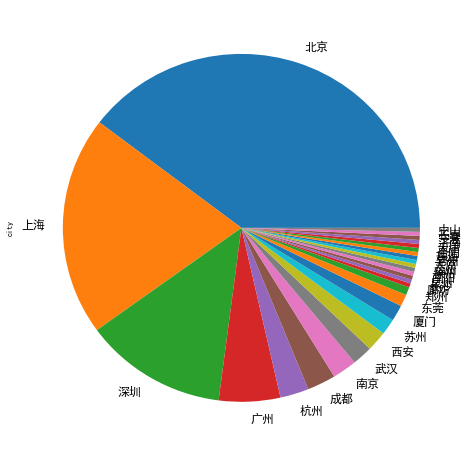

In [4]:
# 根据地区分布的饼图
df['city'].value_counts().plot(kind='pie')
plt.show